# Setup

In [4]:
# !pwd
# # If working directory does not equal the project root, run the following code once (and once only):
# import os
# os.chdir("..")
!pwd

/Users/davidammann/code/dca-python/stroke-therapy-analysis


In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.api as sm
from scripts.data_preprocessing import clean, seperate_attention_score_variables, engineer_features
from scripts.utils import lowest_frequency_overview, calculate_odds_ratios

In [6]:
PATH = "./data/raw/stroke_therapy_data_raw.xlsx"

# Preprocessing and Inspecting the Data

### Cleaning Data

In [7]:
cleaned_only_df = clean(path=PATH)

In [8]:
print(f'Shape:\n{cleaned_only_df.shape}')
print(f'Variables:\n{cleaned_only_df.columns.values}')

Shape:
(4441, 13)
Variables:
['participant_id' 'age_rehab_admission' 'female' 'right_handed'
 'left_affected' 'diagnosis_infarction' 'first_stroke' 'therapy_success'
 'attention_form_session_phase' 'attention_score' 'attention_type'
 'session' 'phase']


In [9]:
cleaned_only_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4441 entries, 0 to 10627
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   participant_id                4441 non-null   int64 
 1   age_rehab_admission           4441 non-null   int64 
 2   female                        4441 non-null   int64 
 3   right_handed                  4441 non-null   int64 
 4   left_affected                 4441 non-null   int64 
 5   diagnosis_infarction          4441 non-null   int64 
 6   first_stroke                  4441 non-null   int64 
 7   therapy_success               4441 non-null   int64 
 8   attention_form_session_phase  4441 non-null   object
 9   attention_score               4441 non-null   int64 
 10  attention_type                4441 non-null   object
 11  session                       4441 non-null   int64 
 12  phase                         4441 non-null   int64 
dtypes: int64(11), obj

In [10]:
cleaned_only_df.describe()

,participant_id,age_rehab_admission,female,right_handed,left_affected,diagnosis_infarction,first_stroke,therapy_success,attention_score,session,phase
count,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000
mean,36.190272,63.975231,0.352173,0.944832,0.540869,0.801396,0.950912,0.227877,2.675073,11.217293,1.628462
std,20.775073,14.328036,0.477701,0.228333,0.498383,0.398994,0.216076,0.419510,0.549801,5.363064,0.683948
min,1.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000
25%,17.000000,56.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000,7.000000,1.000000
50%,37.000000,67.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,11.000000,2.000000
75%,55.000000,74.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,16.000000,2.000000
max,69.000000,85.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,30.000000,5.000000


### Splitting up the Attention Variable

In [11]:
attention_split_df = seperate_attention_score_variables(cleaned_only_df)

In [12]:
print(f'Shape:\n{attention_split_df.shape}')
print(f'Variables:\n{attention_split_df.columns.values}')

Shape:
(2223, 13)
Variables:
['participant_id' 'age_rehab_admission' 'female' 'right_handed'
 'left_affected' 'diagnosis_infarction' 'first_stroke' 'therapy_success'
 'session' 'phase' 'attention_score_ab' 'attention_score_as' 'as_minus_ab']


In [13]:
attention_split_df.describe()

,participant_id,age_rehab_admission,female,right_handed,left_affected,diagnosis_infarction,first_stroke,therapy_success,session,phase,attention_score_ab,attention_score_as,as_minus_ab
count,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.00000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000
mean,36.213225,63.984256,0.352227,0.944669,0.540711,0.80117,0.950967,0.227620,11.220423,1.628880,2.572109,2.778182,0.206073
std,20.781653,14.326375,0.477772,0.228676,0.498452,0.39921,0.215985,0.419391,5.362972,0.684411,0.565753,0.509612,0.557703
min,1.000000,19.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,-2.000000
25%,17.500000,56.000000,0.000000,1.000000,0.000000,1.00000,1.000000,0.000000,7.000000,1.000000,2.000000,3.000000,0.000000
50%,37.000000,67.000000,0.000000,1.000000,1.000000,1.00000,1.000000,0.000000,11.000000,2.000000,3.000000,3.000000,0.000000
75%,55.000000,74.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000,16.000000,2.000000,3.000000,3.000000,1.000000
max,69.000000,85.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,30.000000,5.000000,3.000000,3.000000,3.000000


In [14]:
attention_split_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2223 entries, 0 to 4392
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   participant_id        2223 non-null   int64  
 1   age_rehab_admission   2223 non-null   int64  
 2   female                2223 non-null   int64  
 3   right_handed          2223 non-null   int64  
 4   left_affected         2223 non-null   int64  
 5   diagnosis_infarction  2223 non-null   int64  
 6   first_stroke          2223 non-null   int64  
 7   therapy_success       2223 non-null   int64  
 8   session               2223 non-null   int64  
 9   phase                 2223 non-null   int64  
 10  attention_score_ab    2223 non-null   float64
 11  attention_score_as    2223 non-null   float64
 12  as_minus_ab           2223 non-null   float64
dtypes: float64(3), int64(10)
memory usage: 243.1 KB


### Engineering New Features

In [15]:
df = engineer_features(cleaned_only_df, attention_split_df)
df

,participant_id,age_rehab_admission,female,right_handed,left_affected,diagnosis_infarction,first_stroke,therapy_success,session,phase,attention_score_ab,attention_score_as,as_minus_ab,attention_score_ab_std,attention_score_as_std,as_minus_ab_std,total_phases,initial_attention_score_ab,initial_attention_score_as,initial_as_minus_ab
0,1,67,0,1,1,1,1,0,3,1,1,1,0,0.554122,0.888314,0.822753,40,1,1,0
1,2,25,1,1,1,1,1,0,3,1,3,3,0,0.000000,0.000000,0.000000,32,3,3,0
2,3,56,0,1,1,1,1,0,3,1,3,2,-1,0.377964,0.318728,0.531545,36,3,2,-1
3,4,74,0,1,1,1,1,1,3,1,3,3,0,0.690484,0.694858,0.579969,45,3,3,0
4,7,71,1,1,0,1,1,0,3,1,3,3,0,1.012739,0.584321,0.837708,39,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,10,83,1,1,1,1,1,0,30,1,3,3,0,0.547558,0.401349,0.539603,75,2,2,0
2219,10,83,1,1,1,1,1,0,30,2,3,3,0,0.547558,0.401349,0.539603,75,2,2,0
2220,65,77,1,1,0,1,1,0,9,3,2,2,0,0.494152,0.287145,0.532258,44,2,3,1
2221,32,74,0,1,0,1,1,0,15,1,2,2,0,0.384900,0.566558,0.496904,27,2,2,0


In [16]:
print(f'Shape:\n{df.shape}')
print(f'Variables:\n{df.columns.values}')

Shape:
(2223, 20)
Variables:
['participant_id' 'age_rehab_admission' 'female' 'right_handed'
 'left_affected' 'diagnosis_infarction' 'first_stroke' 'therapy_success'
 'session' 'phase' 'attention_score_ab' 'attention_score_as' 'as_minus_ab'
 'attention_score_ab_std' 'attention_score_as_std' 'as_minus_ab_std'
 'total_phases' 'initial_attention_score_ab' 'initial_attention_score_as'
 'initial_as_minus_ab']


In [17]:
df.describe()

,participant_id,age_rehab_admission,female,right_handed,left_affected,diagnosis_infarction,first_stroke,therapy_success,session,phase,attention_score_ab,attention_score_as,as_minus_ab,attention_score_ab_std,attention_score_as_std,as_minus_ab_std,total_phases,initial_attention_score_ab,initial_attention_score_as,initial_as_minus_ab
count,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.00000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000
mean,36.213225,63.984256,0.352227,0.944669,0.540711,0.80117,0.950967,0.227620,11.220423,1.628880,2.571300,2.776878,0.205578,0.470454,0.363910,0.495997,38.549258,2.677013,2.780477,0.103464
std,20.781653,14.326375,0.477772,0.228676,0.498452,0.39921,0.215985,0.419391,5.362972,0.684411,0.566246,0.510613,0.557677,0.159368,0.213591,0.161560,8.770716,0.540899,0.495194,0.410376
min,1.000000,19.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,20.000000,1.000000,1.000000,-1.000000
25%,17.500000,56.000000,0.000000,1.000000,0.000000,1.00000,1.000000,0.000000,7.000000,1.000000,2.000000,3.000000,0.000000,0.415149,0.192450,0.459340,34.000000,2.000000,3.000000,0.000000
50%,37.000000,67.000000,0.000000,1.000000,1.000000,1.00000,1.000000,0.000000,11.000000,2.000000,3.000000,3.000000,0.000000,0.496198,0.367701,0.510352,37.000000,3.000000,3.000000,0.000000
75%,55.000000,74.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000,16.000000,2.000000,3.000000,3.000000,1.000000,0.551733,0.542627,0.560708,41.000000,3.000000,3.000000,0.000000
max,69.000000,85.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,30.000000,5.000000,3.000000,3.000000,3.000000,1.012739,0.888314,0.837708,75.000000,3.000000,3.000000,1.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2223 entries, 0 to 2222
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   participant_id              2223 non-null   int64  
 1   age_rehab_admission         2223 non-null   int64  
 2   female                      2223 non-null   int64  
 3   right_handed                2223 non-null   int64  
 4   left_affected               2223 non-null   int64  
 5   diagnosis_infarction        2223 non-null   int64  
 6   first_stroke                2223 non-null   int64  
 7   therapy_success             2223 non-null   int64  
 8   session                     2223 non-null   int64  
 9   phase                       2223 non-null   int64  
 10  attention_score_ab          2223 non-null   int64  
 11  attention_score_as          2223 non-null   int64  
 12  as_minus_ab                 2223 non-null   int64  
 13  attention_score_ab_std      2223 

# Analysing the Data

## Overview

### Correlations

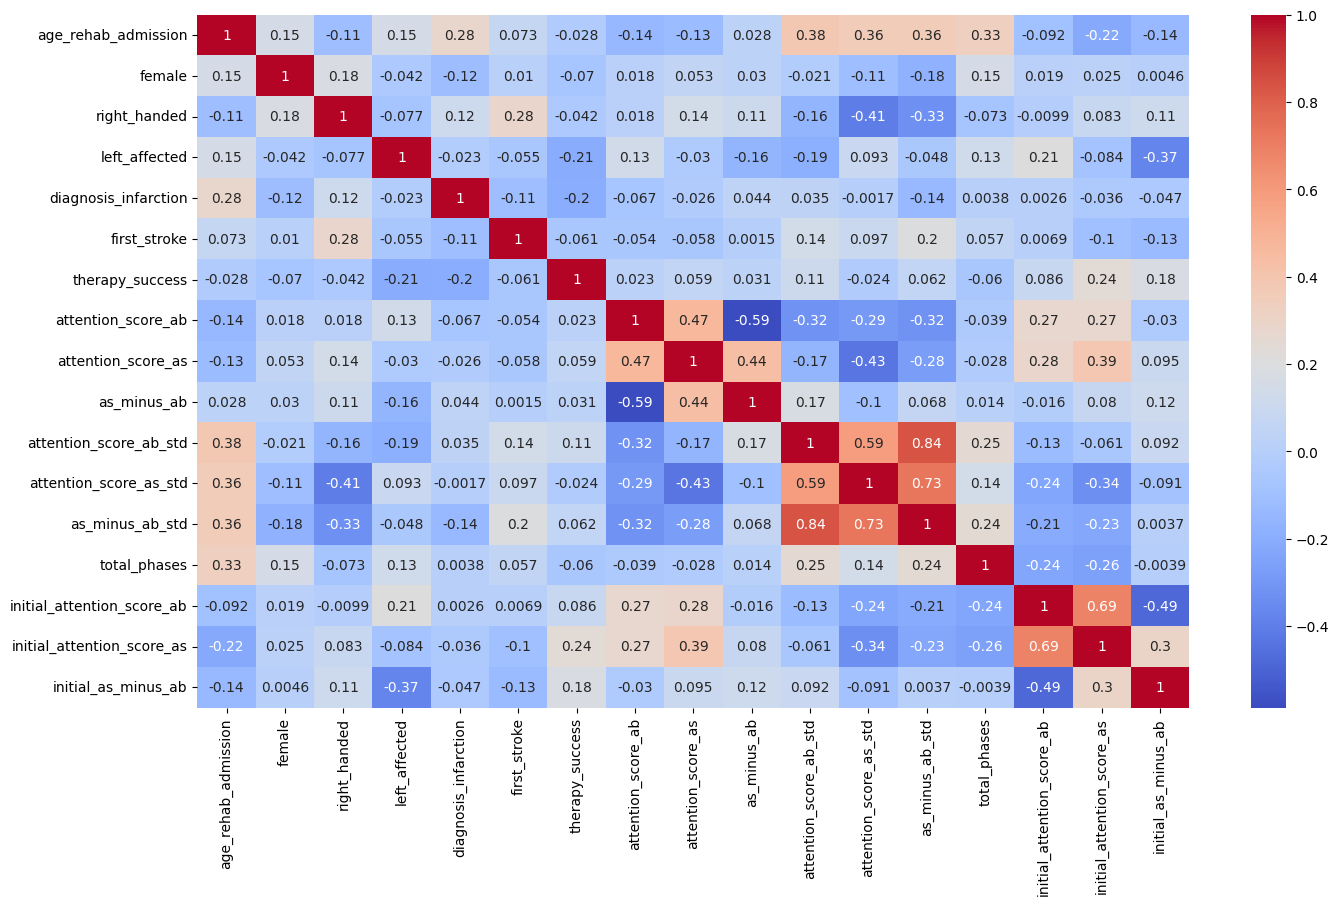

In [19]:
plt.figure(figsize=(16, 9))
data_viz = df.drop(columns=["participant_id", "session", "phase"])
correlation_heatmap = sns.heatmap(data_viz.corr(), cmap="coolwarm", annot=True);
plt.savefig('./visualizations/correlation_heatmap.png')
plt.show()

### Visualizing Sets of Four Variables with Bubble Plots

The following is just one example:

In [20]:
bubble_df =(cleaned_only_df
 .dropna()
 .groupby(["participant_id", "attention_type"])
 .agg({
    'age_rehab_admission': ["median"],
    'female': ["median"],
    'session': ['max'],
    'phase': ['mean'],
    'attention_score': ["mean"],
    'therapy_success': ["median"]
    })
 .reset_index()
)
bubble_df.columns = [
    "participant_id",
    "attention_type",
    "age_rehab_admission",
    "weiblich",
    "max_sessions",
    "mean_phases",
    "mean_attention_score",
    "therapy_success"
]
bubble_df

,participant_id,attention_type,age_rehab_admission,weiblich,max_sessions,mean_phases,mean_attention_score,therapy_success
0,1,AB,67.0,0.0,20,1.725000,1.525000,0.0
1,1,AS,67.0,0.0,20,1.725000,1.325000,0.0
2,2,AB,25.0,1.0,22,1.406250,3.000000,0.0
3,2,AS,25.0,1.0,22,1.406250,3.000000,0.0
4,3,AB,56.0,0.0,20,1.611111,2.833333,0.0
...,...,...,...,...,...,...,...,...
115,67,AS,75.0,0.0,20,1.893617,2.255319,0.0
116,68,AB,76.0,0.0,20,1.795455,2.613636,0.0
117,68,AS,76.0,0.0,20,1.795455,2.977273,0.0
118,69,AB,70.0,0.0,20,1.605263,2.394737,0.0


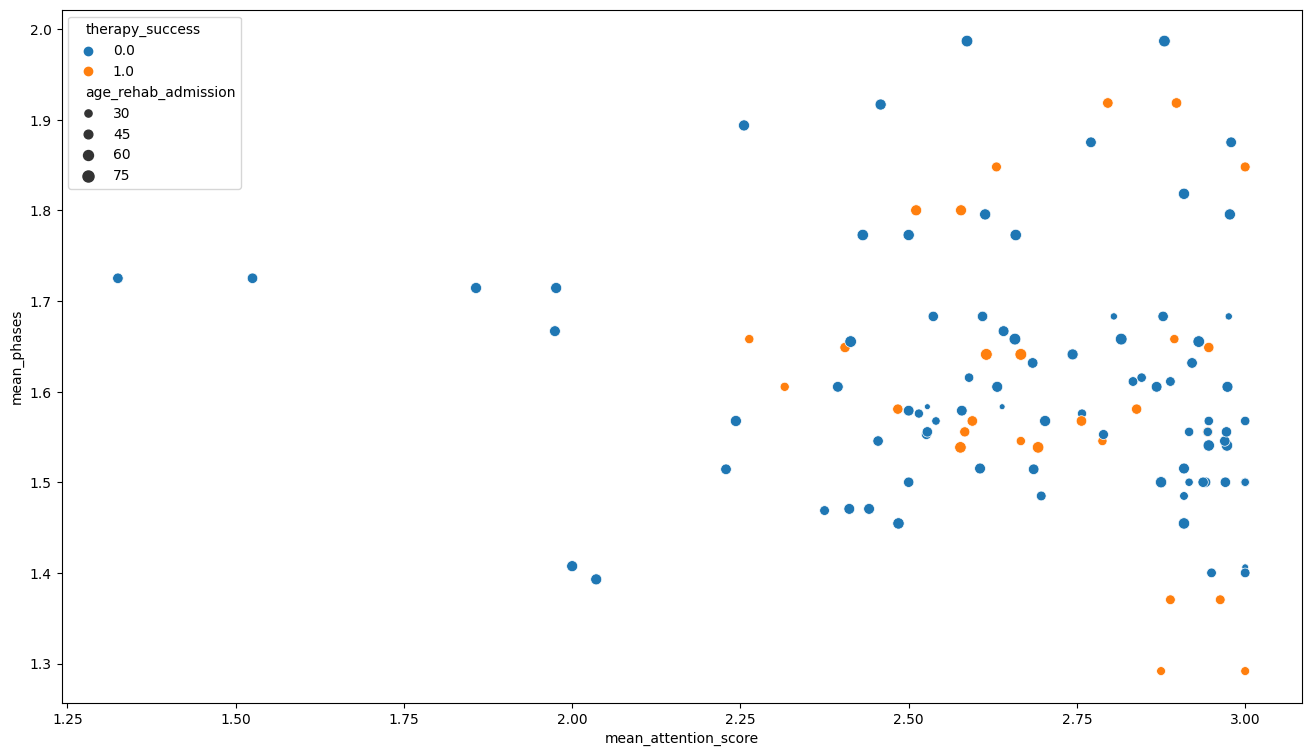

In [21]:
plt.figure(figsize=(16, 9))
bubble_plot = sns.scatterplot(
    data=bubble_df,
    x="mean_attention_score",
    y="mean_phases",
    hue="therapy_success",
    size="age_rehab_admission",
);
plt.savefig('./visualizations/bubble_plot.png')
plt.show()

### Distribution of Sessions Total per Participant

In [22]:
max_sessions_per_participant =(cleaned_only_df
 .dropna()
 .groupby(["participant_id"])
 .agg({
    'session': ['max'],
    })
 .reset_index()
)
max_sessions_per_participant.columns = ["participant_id", "session_total"]

Numeric:

In [23]:
participants_per_maximum = max_sessions_per_participant.session_total.value_counts().sort_index(ascending=False)
participants_per_maximum

30     1
22     1
21     4
20    49
17     1
15     3
14     1
Name: session_total, dtype: int64

Visual:

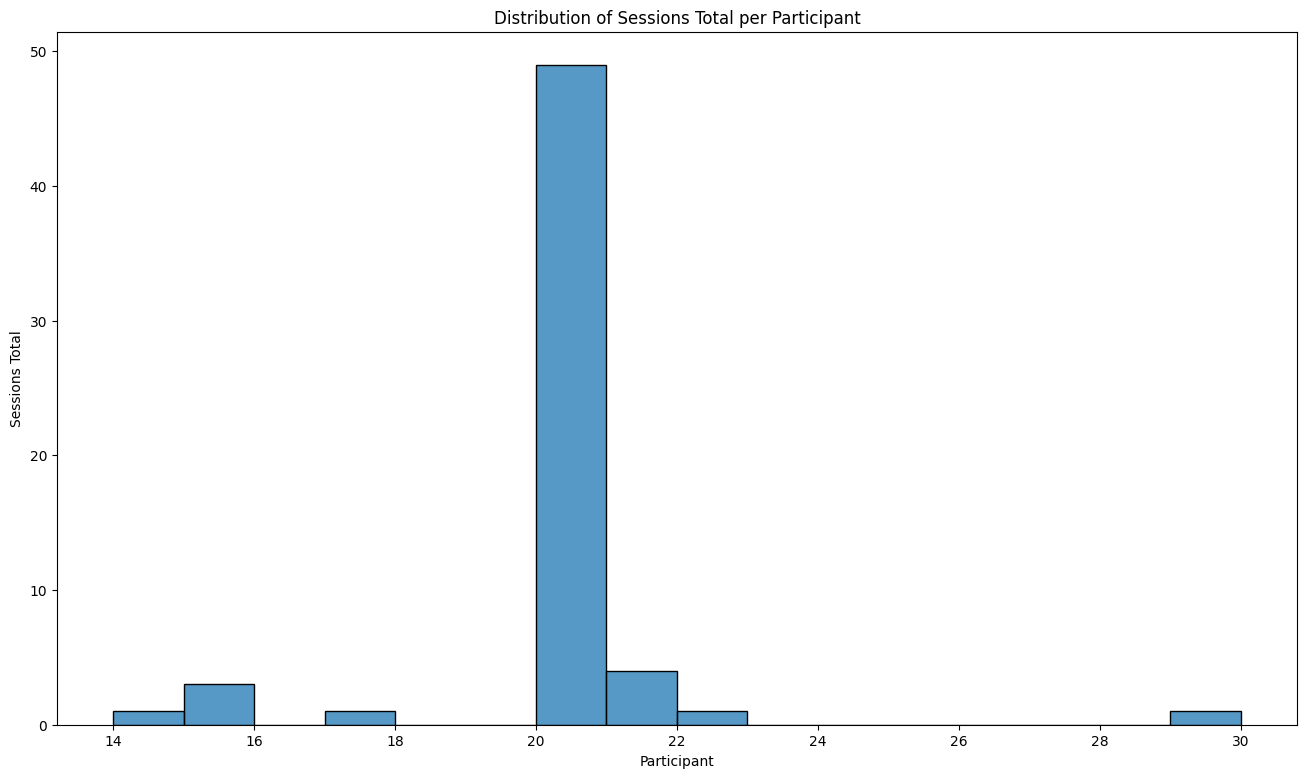

In [24]:
plt.figure(figsize=(16, 9))
total_sessions = sns.histplot(data=max_sessions_per_participant.session_total, binwidth=1, palette="crest");
plt.title('Distribution of Sessions Total per Participant')
plt.xlabel('Participant')
plt.ylabel('Sessions Total');
plt.savefig('./visualizations/total_sessions.png')
plt.show()

### Distribution of Number of Phases per Session per Participant

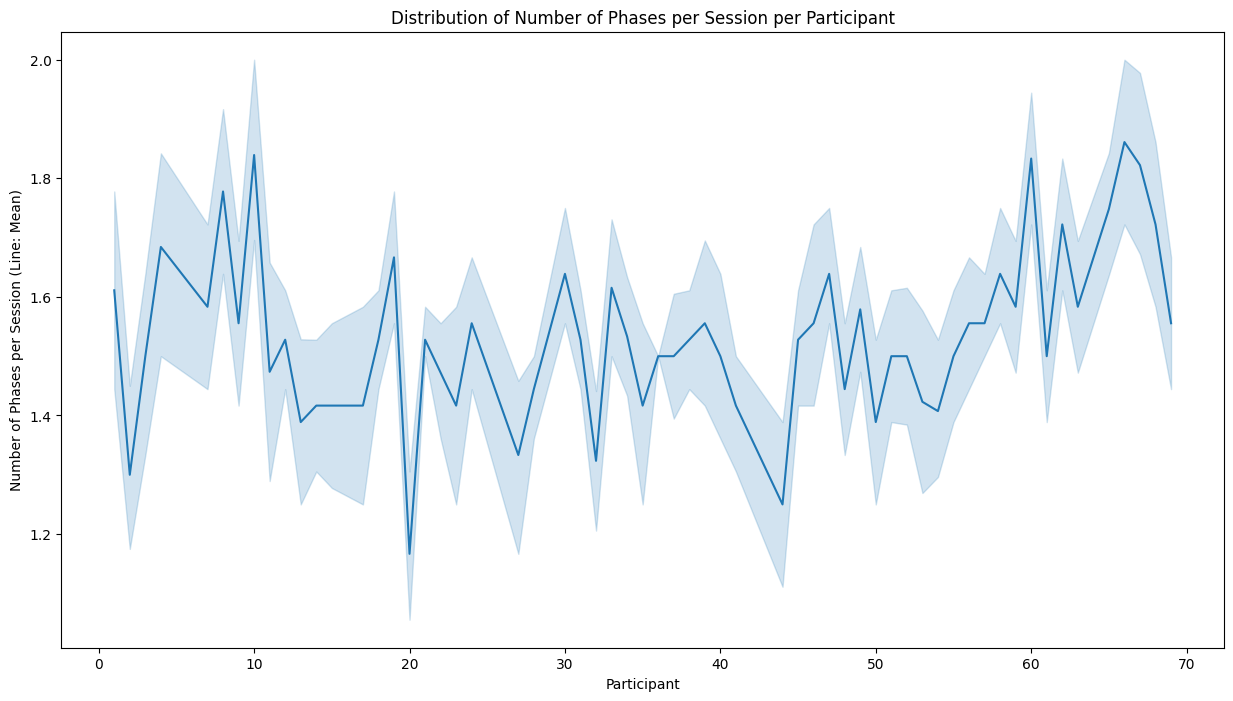

In [25]:
mean_phases_per_participant =(cleaned_only_df
 .dropna()
 .groupby(["participant_id", "session"])
 .agg({
    'phase': ['mean'],
    })
 .reset_index()
)
mean_phases_per_participant.columns = ["participant_id", "session", "mean_phases"]
plt.figure(figsize=(15, 8))
sns.lineplot(
    data=mean_phases_per_participant,
    x="participant_id",
    y="mean_phases",
    color="#1f77b4",
);

plt.title('Distribution of Number of Phases per Session per Participant')
plt.xlabel('Participant')
plt.ylabel('Number of Phases per Session (Line: Mean)');

## Question by Therapist: Which participants consistently had attention scores above one?

In [26]:
min_grouped_df = (df
 .groupby("participant_id")
 .min()
)
consistently_above_one = (min_grouped_df
 [(min_grouped_df.attention_score_ab > 1) & (min_grouped_df.attention_score_as > 1)]
 .reset_index()
 .participant_id.unique()
)
print(f'Participants that were consistently above one (IDs):\n{", ".join([str(num) for num in consistently_above_one])}')
print(f'Fraction that was consistently above one:\n{len(consistently_above_one) / 60 * 100} %')

Participants that were consistently above one (IDs):
2, 3, 8, 11, 13, 14, 15, 18, 20, 21, 23, 24, 27, 33, 36, 44, 45, 48, 50, 53, 55, 56, 58, 59, 60, 61, 65
Fraction that was consistently above one:
45.0 %


## Viewing Individual Trajectories with Interactive Plot

In [27]:
#
def get_background_color(success):
    return '#E8F2E4' if success == 1 else '#ffdddd'

data_preproc = cleaned_only_df

participants = data_preproc['participant_id'].unique()
attention_types = data_preproc['attention_type'].unique()

colors = px.colors.qualitative.Plotly

fig = go.Figure()

for participant in participants:
    for att_type_index, att_type in enumerate(attention_types):
        data_1_viz = data_preproc[(data_preproc.participant_id == participant) & (data_preproc.attention_type == att_type)]
        if not data_1_viz.empty:
            data_1_viz = data_1_viz.groupby(["participant_id", "attention_type", "session"]).mean().attention_score.reset_index()

            fig.add_trace(go.Scatter(x=data_1_viz['session'],
                                     y=data_1_viz['attention_score'],
                                     mode='lines+markers',
                                     name=f'Participant {participant} ({att_type})',
                                     visible=False,
                                     line=dict(width=2, color=colors[att_type_index % len(colors)]),
                                     marker=dict(size=6, symbol='circle')))

steps = []
for i, participant in enumerate(participants):

    success = data_preproc[data_preproc['participant_id'] == participant]['therapy_success'].iloc[0]
    background_color = get_background_color(success)

    step = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data)},
              {"title.text": "Attention Score per Participant and Session",
               "plot_bgcolor": background_color}],
        label=f"{participant}"
    )
    for j in range(len(attention_types)):
        step["args"][0]["visible"][i * len(attention_types) + j] = True
    steps.append(step)

sliders = [dict(
    active=0,
    currentvalue={"prefix": "Participant: "},
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(
    sliders=sliders,
    title="Attention Score per Participant and Session",
    xaxis_title="Session",
    yaxis_title="Attention Score",
    xaxis=dict(range=[2, 21]),
    template='plotly_dark',  # Dark theme
    plot_bgcolor='rgba(1, 1, 1, 1)',  # Transparent plot background
    paper_bgcolor='rgba(1, 1, 1, 1)',  # Transparent paper background
    font=dict(
        size=14,
        color='white'
    ),
    legend=dict(
        title="Attention Type: ",
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    )
)

fig.update_layout(
    title=dict(
        text="Attention Score per Participant and Session",
        font=dict(size=24, color='white')
    )
)

fig.write_html("./visualizations/individual_trajectories.html")

fig.show()


## The Connection of Average Attention Scores and Therapy Success

### Calculating the Connection Between Average Attention Scores and Therapy Success

In [28]:
# Auxilliary Function and Variable
def session_phase_namer(row):
    return f'E{int(row.session)}P{int(row.phase)}'

number_successfully_treated = (attention_split_df.drop_duplicates("participant_id")).sum().therapy_success

# Method Chaining
data_viz_success = (attention_split_df
 [attention_split_df.therapy_success.eq(1)]
 [attention_split_df.session.lt(21)] # outlier
 .groupby(["session", "phase"])
 .agg(
    phase_participation=('participant_id', 'nunique'),
    attention_score_as=('attention_score_as', 'mean'),
    attention_score_ab=('attention_score_ab', 'mean')
    )
 .assign(phase_participation=lambda df_: round(df_.phase_participation / number_successfully_treated * 100).astype(int))
 .reset_index()
 .assign(session_phase=lambda df_: df_.apply(session_phase_namer, axis=1))
 [["session_phase", "phase_participation", "attention_score_ab", "attention_score_as"]]
)
data_viz_success.head(4)

/var/folders/q1/pj4fwjss5fbf9mqj73kyy1d00000gn/T/ipykernel_35440/3185296962.py:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,session_phase,phase_participation,attention_score_ab,attention_score_as
0,E3P1,100,2.785714,3.000000
1,E3P2,86,2.250000,2.250000
2,E3P3,64,2.666667,2.888889
3,E4P1,100,2.642857,2.571429


### Visualisation Regarding Success and Attention Type AB

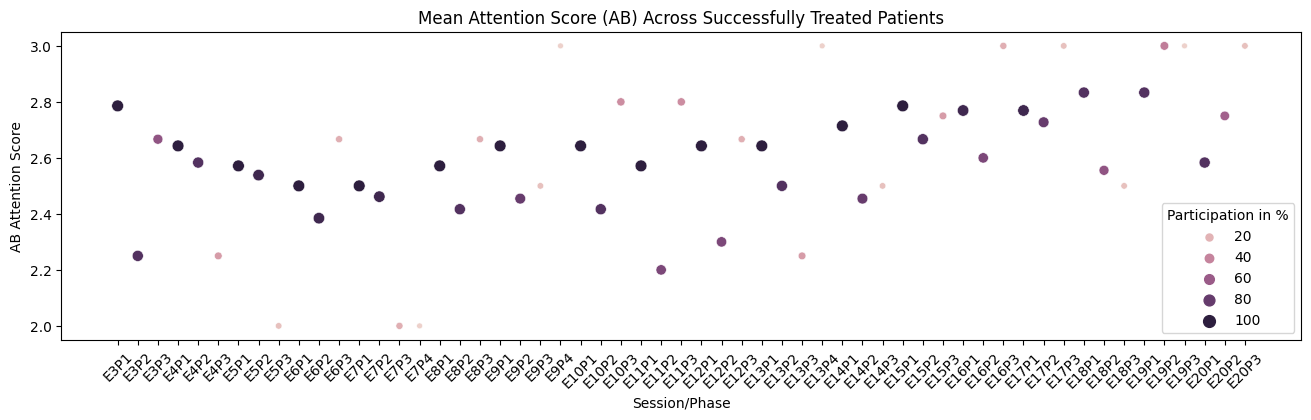

In [29]:
plt.figure(figsize=(16, 4))
sns.scatterplot(
    data=data_viz_success,
    x="session_phase",
    y="attention_score_ab",
    size="phase_participation",
    hue="phase_participation"
)
plt.xticks(rotation=45);
plt.xlabel("Session/Phase")
plt.ylabel("AB Attention Score")
plt.title("Mean Attention Score (AB) Across Successfully Treated Patients")
plt.legend(title="Participation in %")
plt.show()

### Visualisation Regarding Success and Attention Type AS

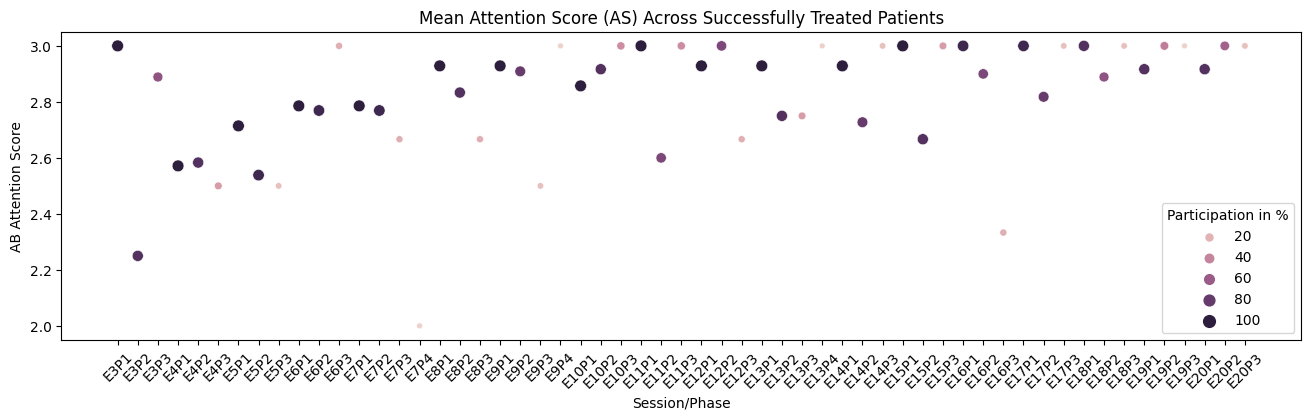

In [30]:
plt.figure(figsize=(16, 4))
sns.scatterplot(
    data=data_viz_success,
    x="session_phase",
    y="attention_score_as",
    size="phase_participation",
    hue="phase_participation"
)
plt.xticks(rotation=45);
plt.xlabel("Session/Phase")
plt.ylabel("AB Attention Score")
plt.title("Mean Attention Score (AS) Across Successfully Treated Patients")
plt.legend(title="Participation in %")
plt.show()

### Calculating the Connection Between Average Attention Scores and Therapy Failure 

In [31]:
number_unsuccessfully_treated = 60 - number_successfully_treated

data_viz_no_success = (df
 [df.therapy_success.eq(0)]
 [df.session.lt(21)] # outlier
 .groupby(["session", "phase"])
 .agg(
    phase_participation=('participant_id', 'nunique'),
    attention_score_as=('attention_score_as', 'mean'),
    attention_score_ab=('attention_score_ab', 'mean')
    )
 .assign(phase_participation=lambda df_: round(df_.phase_participation / number_unsuccessfully_treated * 100).astype(int))
 .reset_index()
 .assign(session_phase=lambda df_: df_.apply(session_phase_namer, axis=1))
 [["session_phase", "phase_participation", "attention_score_ab", "attention_score_as"]]
)
data_viz_no_success.head(3)

/var/folders/q1/pj4fwjss5fbf9mqj73kyy1d00000gn/T/ipykernel_35440/3786275099.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,session_phase,phase_participation,attention_score_ab,attention_score_as
0,E3P1,100,2.673913,2.739130
1,E3P2,96,2.477273,2.636364
2,E3P3,35,2.562500,2.812500


### Visualisation Regarding Failure and Attention Type AB

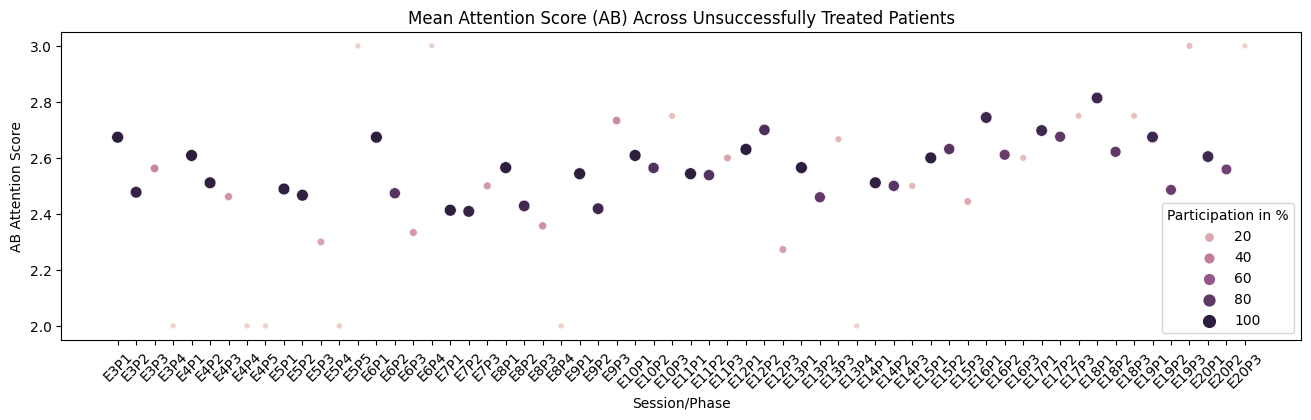

In [32]:
plt.figure(figsize=(16, 4))
sns.scatterplot(
    data=data_viz_no_success,
    x="session_phase",
    y="attention_score_ab",
    size="phase_participation",
    hue="phase_participation"
)
plt.xticks(rotation=45);
plt.xlabel("Session/Phase")
plt.ylabel("AB Attention Score")
plt.title("Mean Attention Score (AB) Across Unsuccessfully Treated Patients")
plt.legend(title="Participation in %")
plt.show()

### Visualisation Regarding Failure and Attention Type AS

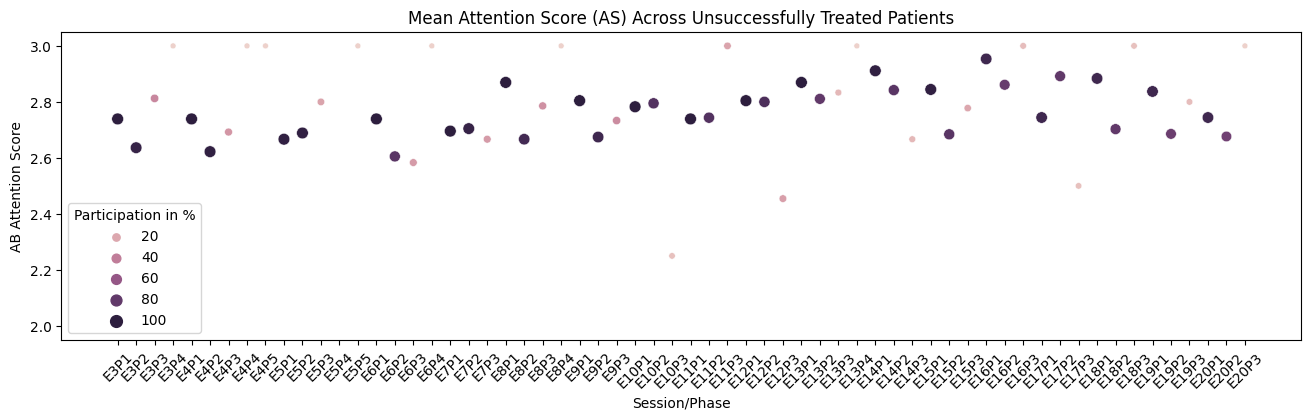

In [33]:
plt.figure(figsize=(16, 4))
sns.scatterplot(
    data=data_viz_no_success,
    x="session_phase",
    y="attention_score_as",
    size="phase_participation",
    hue="phase_participation"
)
plt.xticks(rotation=45);
plt.xlabel("Session/Phase")
plt.ylim(1.95, 3.05)
plt.ylabel("AB Attention Score")
plt.title("Mean Attention Score (AS) Across Unsuccessfully Treated Patients")
plt.legend(title="Participation in %")
plt.show()

## 

## Logistic Regressions

### Deciding on Which Predictors to Include in the Logistic Regression

In [34]:
lowest_frequency_overview(df)  # ordered by fraction times n_unique

,col_name,least_freq_val,fraction,n_unique
0,initial_as_minus_ab,-1,3.779,3
1,initial_attention_score_as,1,3.689,3
2,initial_attention_score_ab,1,3.689,3
3,total_phases,20,0.900,24
4,as_minus_ab_std,0.223607,0.900,58
5,attention_score_as_std,0.223607,0.900,52
6,attention_score_ab_std,0.28233,1.080,55
7,as_minus_ab,3,0.045,6
8,attention_score_as,0,0.495,4
9,attention_score_ab,0,0.225,4


### Condensing the Data by Using Average Values Across Phases

In [35]:
df_shortened = (df
    [[
    'therapy_success',
    'attention_score_ab', 'attention_score_as', 'as_minus_ab',
    'attention_score_ab_std', 'attention_score_as_std', 'as_minus_ab_std',
    "initial_attention_score_ab", "initial_attention_score_as", "initial_as_minus_ab",
    'total_phases',
    'age_rehab_admission',
    'female',
    'left_affected',
    'diagnosis_infarction',
    'participant_id'
    ]]
    .assign(participant_id_for_grouping=lambda df_: df_.participant_id) # to retain the participant_ids with its gaps
    .groupby("participant_id_for_grouping")
    .transform("mean")
    .drop_duplicates()
    .assign(mean_minus_initial_as=lambda df_: df_.attention_score_as - df_.initial_attention_score_as)
    .assign(mean_minus_initial_ab=lambda df_: df_.attention_score_ab - df_.initial_attention_score_ab)
    .assign(mean_minus_initial_diff=lambda df_: df_.as_minus_ab - df_.initial_as_minus_ab)
    .rename(columns={
        'attention_score_ab': 'mean_attention_score_ab',
        'attention_score_as': 'mean_attention_score_as',
        'as_minus_ab': 'mean_as_minus_ab',
        'index': 'participant_id',
        })
    [[
        'participant_id',
        'therapy_success',
        'age_rehab_admission',
        'left_affected',
        'female',
        'diagnosis_infarction',
        'total_phases',
        'mean_attention_score_ab',
        'mean_attention_score_as',
        'mean_as_minus_ab',
        'initial_attention_score_ab',
        'initial_attention_score_as',
        'initial_as_minus_ab',
        'mean_minus_initial_as',
        'mean_minus_initial_ab',
        'mean_minus_initial_diff',
        'attention_score_ab_std',
        'attention_score_as_std',
        'as_minus_ab_std',
    ]]  # reordering
)
columns_to_convert = [
    'participant_id',
    'therapy_success',
    'age_rehab_admission',
    'left_affected',
    'female',
    'diagnosis_infarction',
    'total_phases',
    'initial_attention_score_ab',
    'initial_attention_score_as',
    'initial_as_minus_ab',
]
df_shortened[columns_to_convert] = df_shortened[columns_to_convert].astype(int)
df_shortened.describe().T

,count,mean,std,min,25%,50%,75%,max
participant_id,60.0,35.983333,20.185153,1.000000,18.750000,36.500000,53.250000,69.000000
therapy_success,60.0,0.233333,0.426522,0.000000,0.000000,0.000000,0.000000,1.000000
age_rehab_admission,60.0,63.150000,14.532051,19.000000,53.000000,66.000000,74.000000,85.000000
left_affected,60.0,0.533333,0.503098,0.000000,0.000000,1.000000,1.000000,1.000000
female,60.0,0.350000,0.480995,0.000000,0.000000,0.000000,1.000000,1.000000
diagnosis_infarction,60.0,0.800000,0.403376,0.000000,1.000000,1.000000,1.000000,1.000000
total_phases,60.0,36.983333,7.678920,20.000000,33.000000,37.000000,39.000000,75.000000
mean_attention_score_ab,60.0,2.580051,0.288660,1.525000,2.450284,2.588205,2.789889,3.000000
mean_attention_score_as,60.0,2.783384,0.290180,1.325000,2.695804,2.884444,2.964646,3.000000
mean_as_minus_ab,60.0,0.203333,0.214993,-0.200000,0.029412,0.189533,0.361742,0.666667


### Running Regressions on Variety of Predictors

In [36]:
df_of_interest = df_shortened
main_predictors = ['mean_attention_score_ab', 'mean_attention_score_as', 'mean_as_minus_ab',
                   'attention_score_ab_std', 'attention_score_as_std', 'as_minus_ab_std',
                   'initial_attention_score_ab', 'initial_as_minus_ab', #'initial_attention_score_as',
                   'mean_minus_initial_as', 'mean_minus_initial_ab', 'mean_minus_initial_diff']

for predictor in main_predictors:
    X = df_of_interest[[
        predictor,
        'total_phases',
        'age_rehab_admission',
        'female',
        'left_affected',
        'diagnosis_infarction'
    ]]
    y = df_of_interest['therapy_success']
    X = sm.add_constant(X)
    model = sm.Logit(y, X)
    result = model.fit()
    odds_ratios = calculate_odds_ratios(X, result)
    print(odds_ratios)

Optimization terminated successfully.
         Current function value: 0.482091
         Iterations 6
                         Odds Ratio in % Diff.  P-value
const                                   -97.74   0.4382
mean_attention_score_ab                 309.08   0.3510
total_phases                             -2.78   0.5702
age_rehab_admission                       3.41   0.2445
female                                  -37.64   0.5263
left_affected                           -76.68  0.0565*
diagnosis_infarction                    -81.98  0.0488*
Optimization terminated successfully.
         Current function value: 0.481789
         Iterations 6
                         Odds Ratio in % Diff.  P-value
const                                   -98.42   0.4357
mean_attention_score_as                 335.65   0.3635
total_phases                             -2.99   0.5392
age_rehab_admission                       3.21   0.2659
female                                  -38.27   0.5200
left_affecte

### Exploring the Only Significant Predictor of Interest:  *mean_minus_initial_as*

| Predictor                  | Odds Ratio in % Diff. | P-value  |
|----------------------------|-----------------------|----------|
| const                      | 77.95                 | 0.8080   |
| mean_minus_initial_as      | -99.16                | 0.0212*  |
| total_phases               | -5.35                 | 0.3397   |
| age_rehab_admission        | 3.66                  | 0.2320   |
| female                     | -56.14                | 0.3044   |
| left_affected              | -69.04                | 0.1101   |
| diagnosis_infarction       | -88.42                | 0.0344*  |

**Finding**: Apparently, those who on average exceeded the AS value of the first phase (E3P1) in the further course of treatment did not achieve any therapeutic success.

### Visualization of Finding: Looking at Both Attention Types

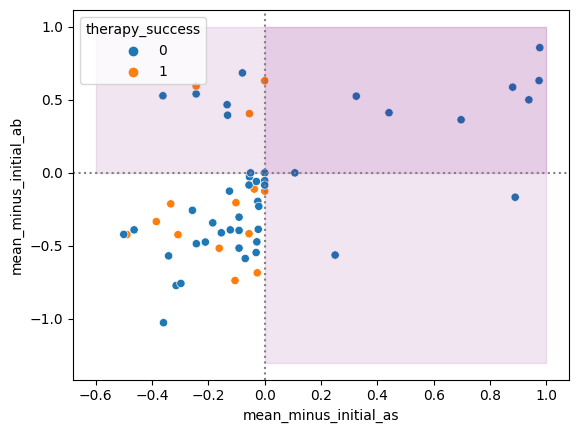

In [37]:
sns.scatterplot(data=df_shortened, y="mean_minus_initial_ab", hue="therapy_success", x="mean_minus_initial_as")
plt.axhline(y=0, color="grey", linestyle=":")
plt.axvline(x=0, color="grey", linestyle=":")
plt.fill_betweenx(y=[-1.3, 1], x1=0, x2=1, alpha=0.1, color="purple")
plt.fill_between(x=[-0.6, 1], y1=0, y2=1, alpha=0.1, color="purple");

### Visualization of Finding: Looking at Attention Type AS Only

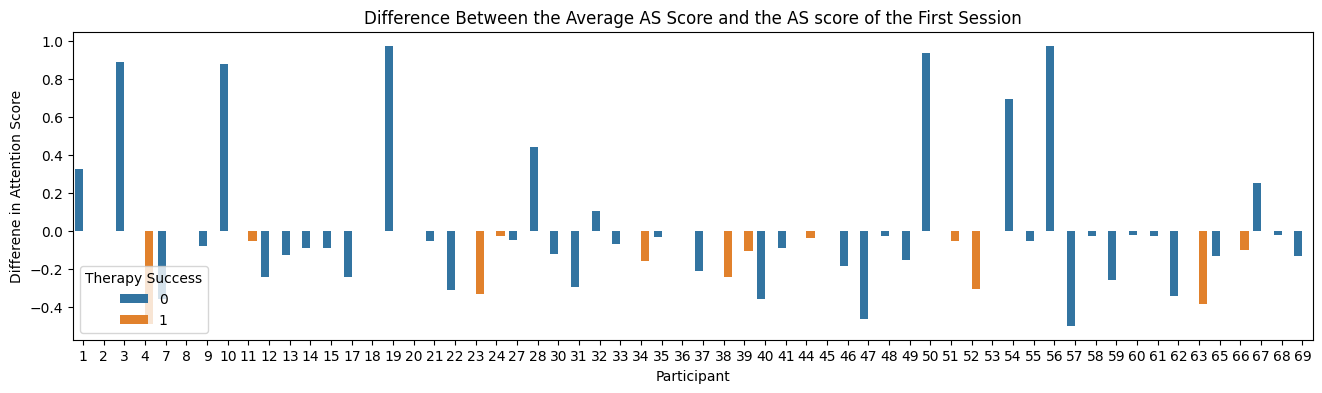

In [38]:
plt.figure(figsize=(16, 4))
sns.barplot(
    data=(df_shortened.assign(Therapieerfolg=lambda df_: np.where(df_.therapy_success == 0, "Nein", "Ja"))),
    x="participant_id",
    y="mean_minus_initial_as",
    hue="therapy_success"
)
plt.legend(title="Therapy Success")
plt.xlabel("Participant")
plt.ylabel("Differene in Attention Score")
plt.title("Difference Between the Average AS Score and the AS score of the First Session");

# Saving Processed Data

In [39]:
cleaned_only_df.to_excel("./data/processed/cleaned_and_melted.xlsx", index=False)
attention_split_df.to_excel("./data/processed/seperate_attention_scores.xlsx", index=False)
df.to_excel("./data/processed/phase_specific.xlsx", index=False)
df_shortened.to_excel("./data/processed/phase_means.xlsx", index=False)